1. Bibliothèques importées avec succès.
Téléchargement du fichier survey_lung_cancer.csv depuis https://huggingface.co/datasets/nateraw/lung-cancer/raw/main/survey%20lung%20cancer.csv...
2. Données chargées. Taille du dataset : (309, 16)
   Classes cibles encodées : ['NO', 'YES'] -> [np.int64(0), np.int64(1)]
   Classes GENDER encodées : ['F', 'M'] -> [np.int64(0), np.int64(1)]
3. Nettoyage et encodage des données terminés.
   Taille du dataset après encodage : (309, 15)

4. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premières 5 colonnes) :
                count          mean       std       min       25%      50%  \
GENDER          309.0  5.242718e-01  0.500221  0.000000  0.000000  1.00000   
AGE             309.0  3.276775e-16  1.001622 -5.083947 -0.692099 -0.08212   
SMOKING         309.0  5.631068e-01  0.496806  0.000000  0.000000  1.00000   
YELLOW_FINGERS  309.0  5.695793e-01  0.495938  0.000000  0.000000  1.00000   
ANXIETY         309.0  4.983819e-01  0.500808 

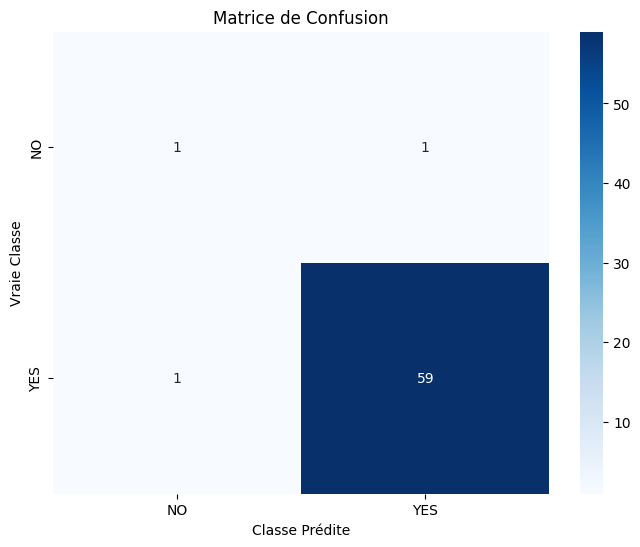

nalyse de jeu de données du cancer du poumon .


In [4]:

# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("1. Bibliothèques importées avec succès.")

# 2. Téléchargement et Chargement des données
# Lien RAW du fichier CSV "survey lung cancer.csv"
CSV_URL = "https://huggingface.co/datasets/nateraw/lung-cancer/raw/main/survey%20lung%20cancer.csv"
FILE_NAME = "survey_lung_cancer.csv"

try:
    print(f"Téléchargement du fichier {FILE_NAME} depuis {CSV_URL}...")
    response = requests.get(CSV_URL)
    response.raise_for_status() # Lève une exception pour les codes d'état HTTP erronés

    # Lire le contenu directement dans un DataFrame
    df = pd.read_csv(StringIO(response.text))

    # Renommer la colonne cible pour la rendre plus facile à utiliser
    df.rename(columns={'LUNG_CANCER': 'TARGET'}, inplace=True)

    print(f"2. Données chargées. Taille du dataset : {df.shape}")

except requests.exceptions.RequestException as e:
    print(f"ERREUR DE TÉLÉCHARGEMENT: Impossible de télécharger le fichier. {e}")
    exit()
except Exception as e:
    print(f"ERREUR LORS DU CHARGEMENT DES DONNÉES: {e}")
    exit()

# 3. Prétraitement des données (Gestion des valeurs manquantes et encodage)

# Ce jeu de données est plus simple : toutes les colonnes sont numériques (1 ou 2) sauf GENDER et TARGET.
# Les valeurs 1 et 2 doivent être converties en 0 et 1 pour la modélisation.

# Encodage de la colonne cible (TARGET: YES/NO -> 1/0)
le_target = LabelEncoder()
df['TARGET'] = le_target.fit_transform(df['TARGET'])
print(f"   Classes cibles encodées : {list(le_target.classes_)} -> {list(le_target.transform(le_target.classes_))}")

# Encodage de la colonne GENDER (M/F -> 1/0)
# M=1, F=0 (ou l'inverse, l'important est la binarisation)
le_gender = LabelEncoder()
df['GENDER'] = le_gender.fit_transform(df['GENDER'])
print(f"   Classes GENDER encodées : {list(le_gender.classes_)} -> {list(le_gender.transform(le_gender.classes_))}")

# Conversion des autres colonnes (symptômes) de 1/2 à 0/1
# Les colonnes de symptômes sont déjà binaires (1=Non, 2=Oui). On les convertit en 0=Non, 1=Oui.
symptom_cols = df.columns.drop(['GENDER', 'AGE', 'TARGET'])
df[symptom_cols] = df[symptom_cols].replace({1: 0, 2: 1})

# Séparation des caractéristiques (X) et de la cible (y)
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Normalisation des données numériques (AGE)
scaler = StandardScaler()
X['AGE'] = scaler.fit_transform(X[['AGE']])

print("3. Nettoyage et encodage des données terminés.")
print(f"   Taille du dataset après encodage : {X.shape}")

# 4. Analyse Exploratoire (EDA) - Statistiques descriptives
print("\n4. Analyse Exploratoire (EDA)...")
print("   Statistiques descriptives (premières 5 colonnes) :")
print(X.describe().transpose().head())

# 5. Modélisation (Classification Binaire)
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle (Régression Logistique)
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n5. Modèle de Régression Logistique entraîné.")

# 6. Évaluation du modèle
print("\n6. Évaluation du modèle...")
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de Classification :")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Visualisation (Optionnel : pour simuler les graphiques du notebook original)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.show()

print("\analyse de jeu de données du cancer du poumon .")